In [2]:
import ROOT
import numpy as np
import time as time

# Count the time
start_time = time.time()

# Load the file and get the tree
#f = ROOT.TFile.Open("SiHitValid_s3654.root", "READ")
f = ROOT.TFile.Open("SiHitValid_minbias_1k.s3654.root", "READ")

tree = f.Get("SiHGTD")
print("The loaded tree 'hgtdHits' contains %d events" % tree.GetEntries())

# Print out the objects and branches
f.ls()
tree.Print()  

The loaded tree 'hgtdHits' contains 1000 events
TFile**		SiHitValid_minbias_1k.s3654.root	
 TFile*		SiHitValid_minbias_1k.s3654.root	
  OBJ: TTree	SiHGTD	SiHGTD : 0 at: 0x4655930
  KEY: TH1D	h_Pixel_x;1	h_Pixel_x
  KEY: TH1D	h_Pixel_y;1	h_Pixel_y
  KEY: TH1D	h_Pixel_z;1	h_Pixel_z
  KEY: TH1D	h_Pixel_r;1	h_Pixel_r
  KEY: TH2D	h_Pixel_xy;1	h_Pixel_xy
  KEY: TH2D	h_Pixel_zr;1	h_Pixel_zr
  KEY: TH1D	h_Pixel_time;1	h_Pixel_time
  KEY: TH1D	h_Pixel_eloss;1	h_Pixel_eloss
  KEY: TH1D	h_Pixel_step;1	h_Pixel_step
  KEY: TH1D	h_Pixel_barcode;1	h_Pixel_barcode
  KEY: TTree	SiPixel;1	SiPixel
  KEY: TH1D	h_SCT_x;1	h_SCT_x
  KEY: TH1D	h_SCT_y;1	h_SCT_y
  KEY: TH1D	h_SCT_z;1	h_SCT_z
  KEY: TH1D	h_SCT_r;1	h_SCT_r
  KEY: TH2D	h_SCT_xy;1	h_SCT_xy
  KEY: TH2D	h_SCT_zr;1	h_SCT_zr
  KEY: TH1D	h_SCT_time;1	h_SCT_time
  KEY: TH1D	h_SCT_eloss;1	h_SCT_eloss
  KEY: TH1D	h_SCT_step;1	h_SCT_step
  KEY: TH1D	h_SCT_barcode;1	h_SCT_barcode
  KEY: TTree	SiSCT;1	SiSCT
  KEY: TH1D	h_HGTD_x;1	h_HGTD_x
  KEY: TH1D	h_HGTD_

In [29]:

# Create histograms
histo_hits = ROOT.TH1F("Hits histo", "HGTD hits vs eta; |eta|; Number of hits", 50, 2.38, 2.82) 
histo_per_interaction = ROOT.TH1F("Histo_hits_per_event", "HGTD hits for %d interactions; Number of hits; Frequency"%tree.GetEntries(), 50, 0., 300.) 

eventCount = 0
printDetailsEventMax=1000

# Number of hits that fall inside the acceptance conditions
hits_per_interaction = np.zeros(1000)


# Loop through each event in the tree
for event in tree:
    
    printEventDetails = (eventCount < printDetailsEventMax) 
    print("eventCount = %d, printEventDetails = %s" % (eventCount, str(printEventDetails)))
    
    hits_count = 0
    if printEventDetails:
        print("--->Number of HGTD hits: %d" % len(event.HGTD_x)) 
        print ("Looping through all the Hits...")
        # For each event, loop threough every hit and check acceptance conditions
        for h in range (len(event.HGTD_x)):
            r = event.HGTD_r[h] #radial coordinate of the hit 
            z = event.HGTD_z[h] #zeta coordinate (along beamline) of the hit
            eta = -np.log((r/z)/2) 
            if abs(eta) > 2.4 and abs(eta) < 2.8 and abs(z) < 3460: #acceptance on the detector, z: get two layers not 4 (z>3460mm)
                hits_count += 1
                histo_hits.Fill(eta)
                
        
    print("Hits inside acceptance: %d"%hits_count)
    hits_per_interaction[eventCount]= hits_count
    
    eventCount += 1 

# Calculate the CPU time
hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Computation done!\nCPU time: %d hours, %d minutes and %d seconds" %(hours, minutes,seconds))

eventCount = 0, printEventDetails = True
--->Number of HGTD hits: 0
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 1, printEventDetails = True
--->Number of HGTD hits: 200
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 2, printEventDetails = True
--->Number of HGTD hits: 115
Looping through all the Hits...
Hits inside acceptance: 56
eventCount = 3, printEventDetails = True
--->Number of HGTD hits: 1363
Looping through all the Hits...
Hits inside acceptance: 74
eventCount = 4, printEventDetails = True
--->Number of HGTD hits: 86
Looping through all the Hits...
Hits inside acceptance: 1
eventCount = 5, printEventDetails = True
--->Number of HGTD hits: 1517
Looping through all the Hits...
Hits inside acceptance: 71
eventCount = 6, printEventDetails = True
--->Number of HGTD hits: 228
Looping through all the Hits...
Hits inside acceptance: 2
eventCount = 7, printEventDetails = True
--->Number of HGTD hits: 690
Looping through all the Hits...


<ipython-input-29-c9002adcc86d>:26: RuntimeWarning: invalid value encountered in log
  eta = -np.log((r/z)/2)


Hits inside acceptance: 23
eventCount = 66, printEventDetails = True
--->Number of HGTD hits: 1513
Looping through all the Hits...
Hits inside acceptance: 68
eventCount = 67, printEventDetails = True
--->Number of HGTD hits: 744
Looping through all the Hits...
Hits inside acceptance: 62
eventCount = 68, printEventDetails = True
--->Number of HGTD hits: 186
Looping through all the Hits...
Hits inside acceptance: 29
eventCount = 69, printEventDetails = True
--->Number of HGTD hits: 226
Looping through all the Hits...
Hits inside acceptance: 16
eventCount = 70, printEventDetails = True
--->Number of HGTD hits: 301
Looping through all the Hits...
Hits inside acceptance: 6
eventCount = 71, printEventDetails = True
--->Number of HGTD hits: 8
Looping through all the Hits...
Hits inside acceptance: 1
eventCount = 72, printEventDetails = True
--->Number of HGTD hits: 447
Looping through all the Hits...
Hits inside acceptance: 14
eventCount = 73, printEventDetails = True
--->Number of HGTD hits:

Looping through all the Hits...
Hits inside acceptance: 21
eventCount = 137, printEventDetails = True
--->Number of HGTD hits: 483
Looping through all the Hits...
Hits inside acceptance: 28
eventCount = 138, printEventDetails = True
--->Number of HGTD hits: 98
Looping through all the Hits...
Hits inside acceptance: 5
eventCount = 139, printEventDetails = True
--->Number of HGTD hits: 493
Looping through all the Hits...
Hits inside acceptance: 28
eventCount = 140, printEventDetails = True
--->Number of HGTD hits: 366
Looping through all the Hits...
Hits inside acceptance: 26
eventCount = 141, printEventDetails = True
--->Number of HGTD hits: 659
Looping through all the Hits...
Hits inside acceptance: 18
eventCount = 142, printEventDetails = True
--->Number of HGTD hits: 49
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 143, printEventDetails = True
--->Number of HGTD hits: 316
Looping through all the Hits...
Hits inside acceptance: 4
eventCount = 144, printEventD

eventCount = 214, printEventDetails = True
--->Number of HGTD hits: 226
Looping through all the Hits...
Hits inside acceptance: 7
eventCount = 215, printEventDetails = True
--->Number of HGTD hits: 573
Looping through all the Hits...
Hits inside acceptance: 39
eventCount = 216, printEventDetails = True
--->Number of HGTD hits: 738
Looping through all the Hits...
Hits inside acceptance: 108
eventCount = 217, printEventDetails = True
--->Number of HGTD hits: 557
Looping through all the Hits...
Hits inside acceptance: 44
eventCount = 218, printEventDetails = True
--->Number of HGTD hits: 1752
Looping through all the Hits...
Hits inside acceptance: 124
eventCount = 219, printEventDetails = True
--->Number of HGTD hits: 307
Looping through all the Hits...
Hits inside acceptance: 10
eventCount = 220, printEventDetails = True
--->Number of HGTD hits: 1184
Looping through all the Hits...
Hits inside acceptance: 78
eventCount = 221, printEventDetails = True
--->Number of HGTD hits: 569
Looping 

eventCount = 314, printEventDetails = True
--->Number of HGTD hits: 280
Looping through all the Hits...
Hits inside acceptance: 33
eventCount = 315, printEventDetails = True
--->Number of HGTD hits: 391
Looping through all the Hits...
Hits inside acceptance: 22
eventCount = 316, printEventDetails = True
--->Number of HGTD hits: 386
Looping through all the Hits...
Hits inside acceptance: 38
eventCount = 317, printEventDetails = True
--->Number of HGTD hits: 632
Looping through all the Hits...
Hits inside acceptance: 25
eventCount = 318, printEventDetails = True
--->Number of HGTD hits: 135
Looping through all the Hits...
Hits inside acceptance: 13
eventCount = 319, printEventDetails = True
--->Number of HGTD hits: 561
Looping through all the Hits...
Hits inside acceptance: 23
eventCount = 320, printEventDetails = True
--->Number of HGTD hits: 201
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 321, printEventDetails = True
--->Number of HGTD hits: 434
Looping thro

Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 415, printEventDetails = True
--->Number of HGTD hits: 525
Looping through all the Hits...
Hits inside acceptance: 18
eventCount = 416, printEventDetails = True
--->Number of HGTD hits: 349
Looping through all the Hits...
Hits inside acceptance: 11
eventCount = 417, printEventDetails = True
--->Number of HGTD hits: 2509
Looping through all the Hits...
Hits inside acceptance: 96
eventCount = 418, printEventDetails = True
--->Number of HGTD hits: 654
Looping through all the Hits...
Hits inside acceptance: 18
eventCount = 419, printEventDetails = True
--->Number of HGTD hits: 1065
Looping through all the Hits...
Hits inside acceptance: 78
eventCount = 420, printEventDetails = True
--->Number of HGTD hits: 629
Looping through all the Hits...
Hits inside acceptance: 27
eventCount = 421, printEventDetails = True
--->Number of HGTD hits: 270
Looping through all the Hits...
Hits inside acceptance: 18
eventCount = 422, print

Hits inside acceptance: 32
eventCount = 545, printEventDetails = True
--->Number of HGTD hits: 73
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 546, printEventDetails = True
--->Number of HGTD hits: 1365
Looping through all the Hits...
Hits inside acceptance: 104
eventCount = 547, printEventDetails = True
--->Number of HGTD hits: 437
Looping through all the Hits...
Hits inside acceptance: 32
eventCount = 548, printEventDetails = True
--->Number of HGTD hits: 379
Looping through all the Hits...
Hits inside acceptance: 30
eventCount = 549, printEventDetails = True
--->Number of HGTD hits: 730
Looping through all the Hits...
Hits inside acceptance: 11
eventCount = 550, printEventDetails = True
--->Number of HGTD hits: 314
Looping through all the Hits...
Hits inside acceptance: 9
eventCount = 551, printEventDetails = True
--->Number of HGTD hits: 939
Looping through all the Hits...
Hits inside acceptance: 56
eventCount = 552, printEventDetails = True
--->Number of 

Hits inside acceptance: 27
eventCount = 658, printEventDetails = True
--->Number of HGTD hits: 238
Looping through all the Hits...
Hits inside acceptance: 10
eventCount = 659, printEventDetails = True
--->Number of HGTD hits: 0
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 660, printEventDetails = True
--->Number of HGTD hits: 1173
Looping through all the Hits...
Hits inside acceptance: 66
eventCount = 661, printEventDetails = True
--->Number of HGTD hits: 90
Looping through all the Hits...
Hits inside acceptance: 10
eventCount = 662, printEventDetails = True
--->Number of HGTD hits: 106
Looping through all the Hits...
Hits inside acceptance: 15
eventCount = 663, printEventDetails = True
--->Number of HGTD hits: 35
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 664, printEventDetails = True
--->Number of HGTD hits: 0
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 665, printEventDetails = True
--->Number of HGTD hi

eventCount = 736, printEventDetails = True
--->Number of HGTD hits: 1996
Looping through all the Hits...
Hits inside acceptance: 85
eventCount = 737, printEventDetails = True
--->Number of HGTD hits: 701
Looping through all the Hits...
Hits inside acceptance: 17
eventCount = 738, printEventDetails = True
--->Number of HGTD hits: 232
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 739, printEventDetails = True
--->Number of HGTD hits: 645
Looping through all the Hits...
Hits inside acceptance: 26
eventCount = 740, printEventDetails = True
--->Number of HGTD hits: 71
Looping through all the Hits...
Hits inside acceptance: 23
eventCount = 741, printEventDetails = True
--->Number of HGTD hits: 207
Looping through all the Hits...
Hits inside acceptance: 26
eventCount = 742, printEventDetails = True
--->Number of HGTD hits: 226
Looping through all the Hits...
Hits inside acceptance: 21
eventCount = 743, printEventDetails = True
--->Number of HGTD hits: 81
Looping throu

Hits inside acceptance: 56
eventCount = 853, printEventDetails = True
--->Number of HGTD hits: 307
Looping through all the Hits...
Hits inside acceptance: 13
eventCount = 854, printEventDetails = True
--->Number of HGTD hits: 0
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 855, printEventDetails = True
--->Number of HGTD hits: 0
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 856, printEventDetails = True
--->Number of HGTD hits: 963
Looping through all the Hits...
Hits inside acceptance: 62
eventCount = 857, printEventDetails = True
--->Number of HGTD hits: 564
Looping through all the Hits...
Hits inside acceptance: 7
eventCount = 858, printEventDetails = True
--->Number of HGTD hits: 908
Looping through all the Hits...
Hits inside acceptance: 110
eventCount = 859, printEventDetails = True
--->Number of HGTD hits: 147
Looping through all the Hits...
Hits inside acceptance: 3
eventCount = 860, printEventDetails = True
--->Number of HGTD h

Hits inside acceptance: 118
eventCount = 922, printEventDetails = True
--->Number of HGTD hits: 296
Looping through all the Hits...
Hits inside acceptance: 0
eventCount = 923, printEventDetails = True
--->Number of HGTD hits: 535
Looping through all the Hits...
Hits inside acceptance: 11
eventCount = 924, printEventDetails = True
--->Number of HGTD hits: 223
Looping through all the Hits...
Hits inside acceptance: 1
eventCount = 925, printEventDetails = True
--->Number of HGTD hits: 265
Looping through all the Hits...
Hits inside acceptance: 20
eventCount = 926, printEventDetails = True
--->Number of HGTD hits: 609
Looping through all the Hits...
Hits inside acceptance: 6
eventCount = 927, printEventDetails = True
--->Number of HGTD hits: 1635
Looping through all the Hits...
Hits inside acceptance: 98
eventCount = 928, printEventDetails = True
--->Number of HGTD hits: 424
Looping through all the Hits...
Hits inside acceptance: 43
eventCount = 929, printEventDetails = True
--->Number of 

Warning in <TFile::Append>: Replacing existing TH1: Hits histo (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Histo_hits_per_event (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


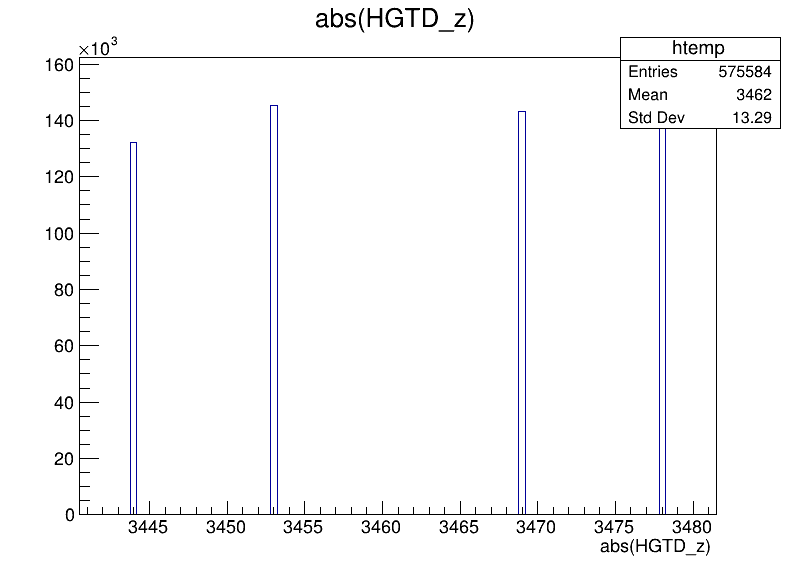

In [5]:
# Draw the 4 layers
c = ROOT.TCanvas("Canvas", "Title", 800, 600)
tree.Draw("abs(HGTD_z)")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


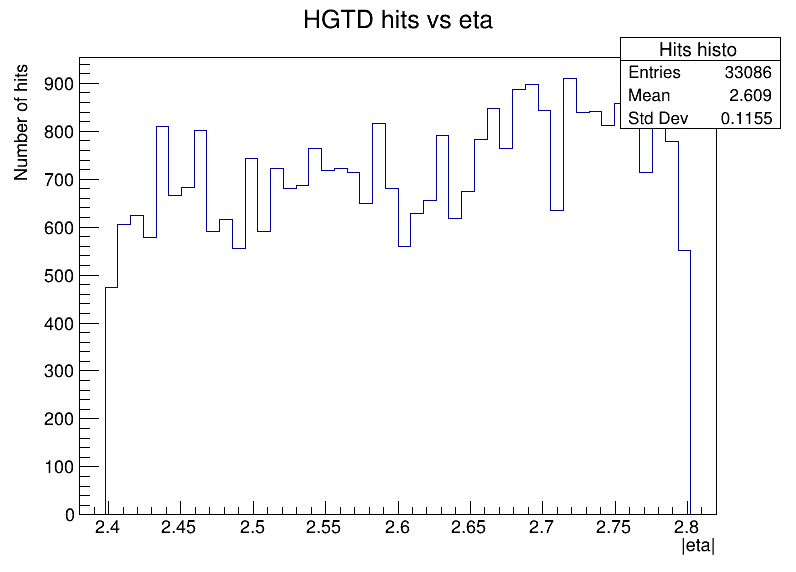

In [30]:
# open a canvas to draw the histogram on
c1 = ROOT.TCanvas("Canvas", "Title", 800, 600)
# draw the histogram
histo_hits.Draw() # draw option "e1" will draw error bars
# open the canvas
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TH1F::SaveAs>: ROOT file hits-per-interaction_PDF.root has been created
Info in <TCanvas::Print>: pdf file Hits per interaction.pdf has been created


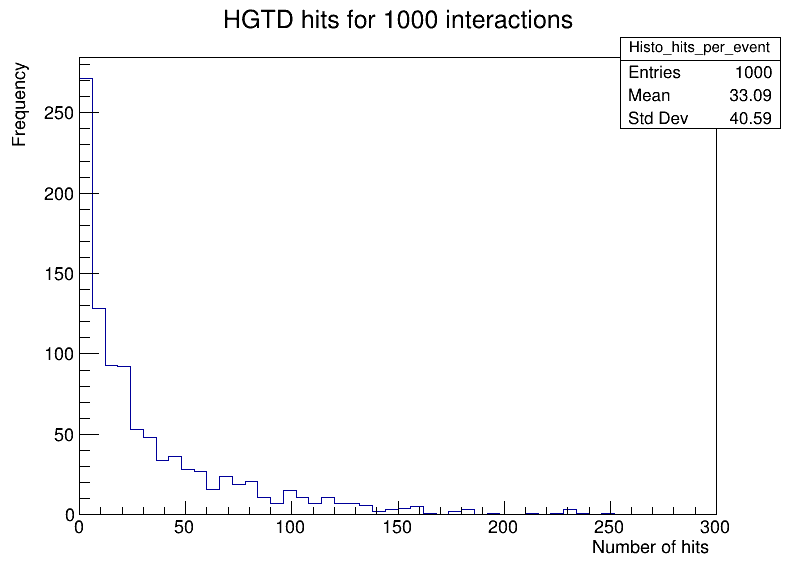

In [31]:
# Fill the histogram with the acceptance hits for each interaction
for i in range (len(hits_per_interaction)):
    histo_per_interaction.Fill(hits_per_interaction[i])

# Plot the histogram
c1 = ROOT.TCanvas("Canvas", "Title", 800, 600)
histo_per_interaction.Draw() 
histo_per_interaction.SaveAs("hits-per-interaction_PDF.root")
c1.Draw()
c1.SaveAs("Hits per interaction.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2
Info in <TCanvas::Print>: pdf file Hits per interaction.pdf has been created


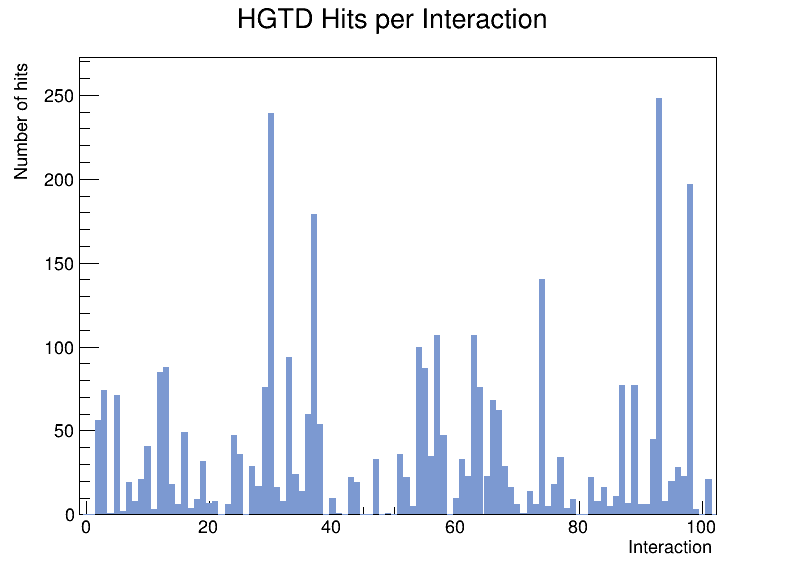

In [7]:
# open a canvas to draw the histogram on
c2 = ROOT.TCanvas("Canvas2", "Title", 800, 600)
x_axis = np.arange(0,1000)
g = ROOT.TGraph(len(hits_per_interaction), x_axis.astype(np.double),hits_per_interaction.astype(np.double))
g.SetTitle( "HGTD Hits per Interaction")
g.GetXaxis().SetTitle('Interaction')
g.GetYaxis().SetTitle('Number of hits')
g.GetXaxis().SetRange(-5,93)
g.SetFillColor(38)
g.Draw('AB')

c2.Draw()
c2.SaveAs("Hits per interaction.pdf")